<a href="https://colab.research.google.com/github/student-monika/Marvel_tasks_Level_2/blob/main/Image_Classification_using_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The MNIST (Modified National Institute of Standards and Technology) dataset is a large database of handwritten digits that is commonly used for training various image processing systems and machine learning models.

Clustering Accuracy: 0.53


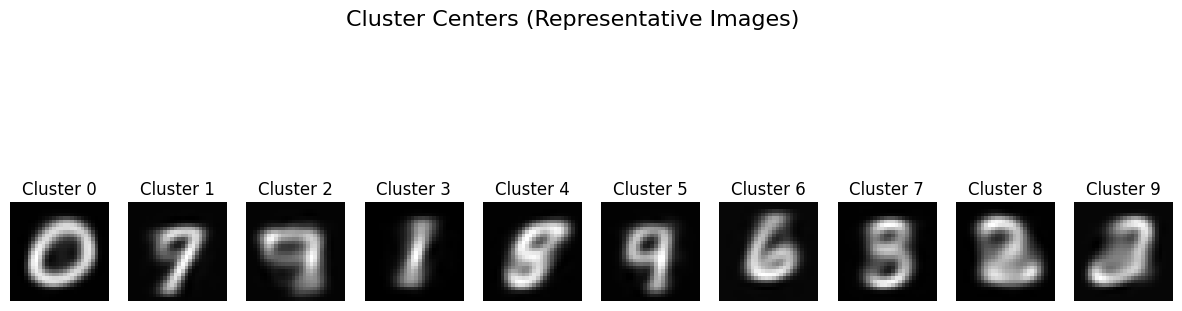

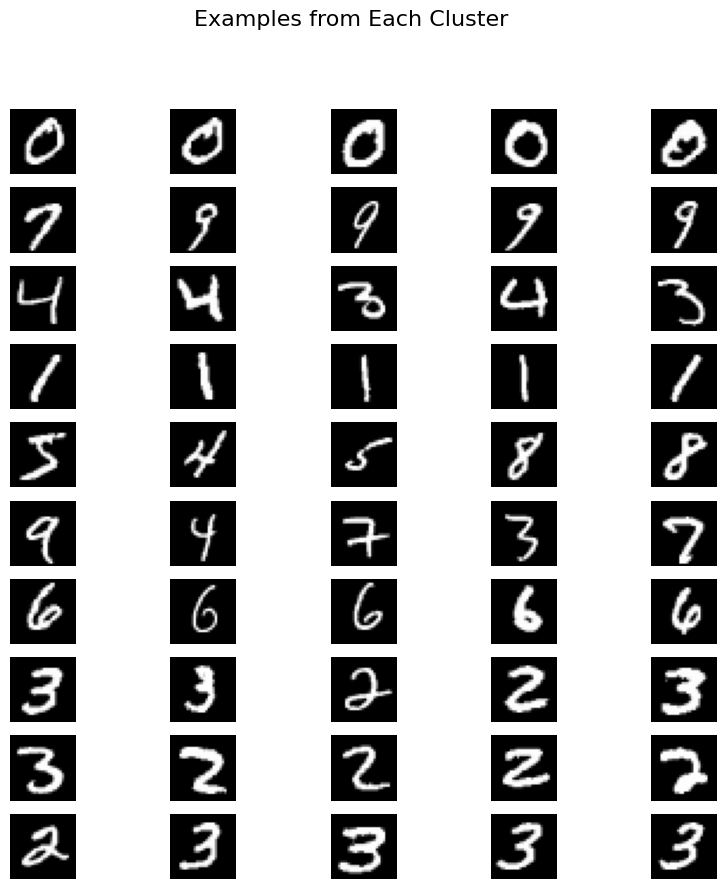

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Step 1: Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA for dimensionality reduction
pca = PCA(n_components=50)  # Reduce dimensionality for efficiency
X_pca = pca.fit_transform(X_scaled)

# Step 3: Apply K-Means clustering
k = 10  # Number of clusters (since we have 10 digits)
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)

# Step 4: Assign labels to clusters
def assign_cluster_labels(kmeans_labels, true_labels, k):
    cluster_labels = np.zeros(k)
    for i in range(k):
        mask = (kmeans_labels == i)
        if np.any(mask):
            cluster_labels[i] = mode(true_labels[mask], keepdims=True).mode[0]  # FIXED
    return cluster_labels

cluster_labels = assign_cluster_labels(y_kmeans, y, k)

# Step 5: Map clusters to digit labels
y_pred = np.array([cluster_labels[label] for label in y_kmeans])

# Step 6: Evaluate Clustering Accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Clustering Accuracy: {accuracy:.2f}")

# Step 7: Function to visualize cluster centers
def plot_cluster_centers(kmeans, n_clusters, image_shape=(28, 28)):
    cluster_centers = pca.inverse_transform(kmeans.cluster_centers_)  # Convert back to original space
    cluster_centers = scaler.inverse_transform(cluster_centers)  # Denormalize

    fig, axes = plt.subplots(1, n_clusters, figsize=(15, 5))
    for i, ax in enumerate(axes):
        ax.imshow(cluster_centers[i].reshape(image_shape), cmap="gray")
        ax.set_title(f"Cluster {i}")
        ax.axis("off")

    plt.suptitle("Cluster Centers (Representative Images)", fontsize=16)
    plt.show()

# Step 8: Plot Cluster Centers
plot_cluster_centers(kmeans, k)

# Step 9: Visualize example images from each cluster
def plot_cluster_examples(X, y_kmeans, n_clusters, image_shape=(28, 28), examples_per_cluster=5):
    fig, axes = plt.subplots(n_clusters, examples_per_cluster, figsize=(10, 10))

    for cluster in range(n_clusters):
        indices = np.where(y_kmeans == cluster)[0][:examples_per_cluster]  # Select examples from each cluster
        for i, idx in enumerate(indices):
            ax = axes[cluster, i]
            ax.imshow(X[idx].reshape(image_shape), cmap="gray")
            ax.axis("off")

    plt.suptitle("Examples from Each Cluster", fontsize=16)
    plt.show()

plot_cluster_examples(X, y_kmeans, k)


Image Segmentation using K Means Clustering

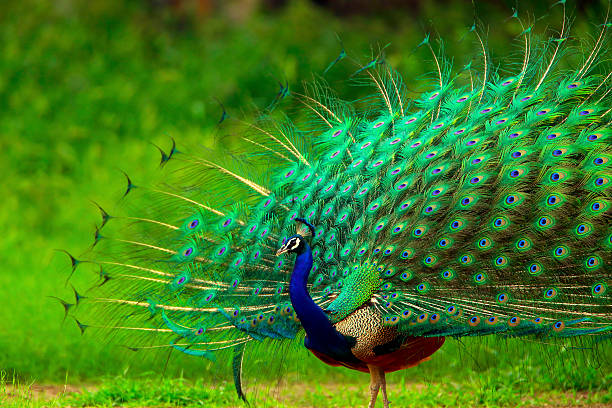

In [ ]:
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow

url = "https://media.istockphoto.com/id/180699358/photo/peacock.jpg?s=612x612&w=0&k=20&c=10hdZK3_qCEWp4-cPm4cXFBVXm2GxOS1nXYZB8kmYBQ="

resp = urllib.request.urlopen(url)
image_array = np.asarray(bytearray(resp.read()), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

cv2_imshow(image)


In [ ]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Converting to float type
pixel_vals = np.float32(pixel_vals)

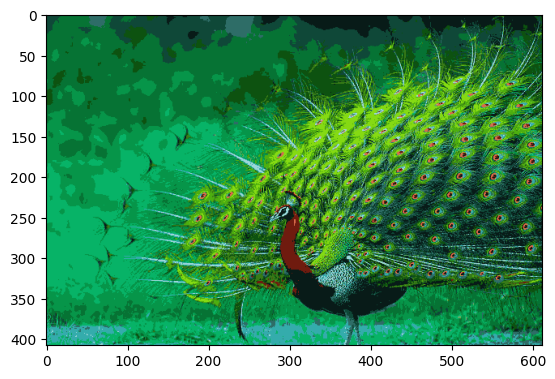

In [ ]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 15
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

plt.imshow(segmented_image)
